# Random Walks 

Once again, a notebook dedicated to the ultimate Random Walks implementation.

# Preliminaries

In [1]:
import numpy as np
import networkx as nx

In [2]:
from mercs import Mercs
from mercs.tests.setup import default_dataset
from mercs.composition import CompositeModel
from mercs.graph import model_to_graph
from mercs.graph import compose_all, add_merge_nodes
from mercs.algo.inference import dask_inference_algorithm

# Train

In [3]:
m_small = Mercs(
    random_state=100,
    prediction_algorithm="it",
    clf_criterion="entropy",
    rgr_criterion="mae",
    selection_algorithm="random",
    nb_iterations=5,
    fraction_missing=0.5,
    max_depth=4,
    regression_max_depth=4,
)

X_train, X_test = default_dataset()

m_small.fit(X_train, nominal_attributes={7})

## IT

d-04
d-01
d-02
d-00
f-36
d-06
f-10
f-20
d-03
f-02
p-07
v-07
d-07


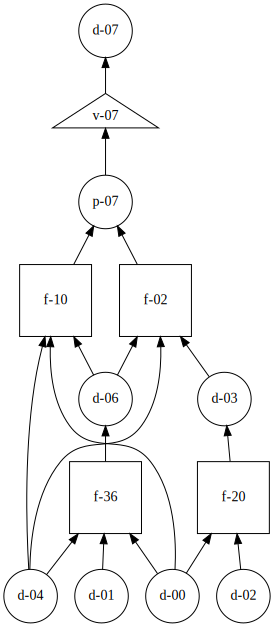

In [8]:
q_code = np.array([0, 0, 0, -1, 0, -1, -1, 1])

y_pred = m_small.predict(X_test, q_code=q_code, prediction_algorithm="it-new")
m_small.show_q_diagram()

## RW

['d-01', 'd-02', 'd-04', 'd-07', 'd-06', 'f-09']
{1, 2, 4, 7} {6}
['d-00', 'd-04', 'd-06', 'd-07', 'f-10', 'p-07', 'v-07']
{0, 4, 6} {7}
d-00
I(d-07)
d-04
d-02
d-01
f-09
d-06
f-10
p-07
v-07
d-07


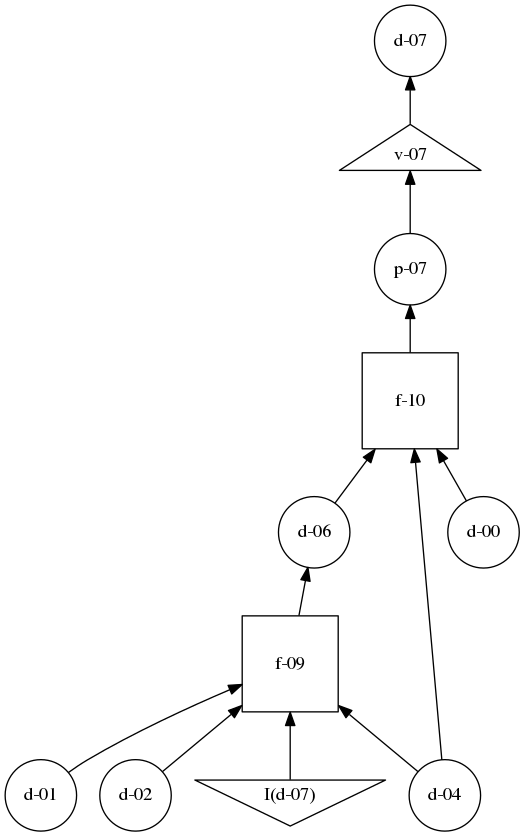

In [9]:
y_pred = m_small.predict(X_test, q_code=q_code, prediction_algorithm="rw-new", max_steps=2)
m_small.show_q_diagram(kind='png', width=200)

# Recursion

In [10]:
cm = CompositeModel(m_small.q_diagram, m_small.q_methods)
types = m_small._get_types(m_small.metadata)

g1 = model_to_graph(cm, types, idx=99)
g2 = model_to_graph(cm, types, idx=100)

KeyError: 'p-07'

In [ ]:
for n,d in m_small.q_diagram.nodes(data=True):
    if d.get("function", None) is not None:
        print(n)

In [ ]:
sorted_nodes = list(nx.topological_sort(g))
sorted_nodes

In [ ]:
filtered_nodes = []
for n in reversed(sorted_nodes):
    if g.nodes[n]["kind"] == 'model': break
    filtered_nodes.append(n)
filtered_nodes = list(reversed(filtered_nodes))
filtered_nodes

In [ ]:
functions = dask_inference_algorithm(g, sorted_nodes=filtered_nodes)